# Mapping in Python

In [2]:
import plotly.express as px
import pandas as pd
import geopandas

from urllib.request import urlopen
import json

It'd be nice to bring the shapefile into a more modern form like GeoJSON, which is also the type of file that Plotly uses in their docs example. So I convert the shapefile I generated in the R script to GeoJSON here using geopandas.

In [2]:
shapefile = geopandas.read_file('US_2020_county_sf.shp')
shapefile.to_file('US_2020_county_sf.geojson', driver='GeoJSON')

<AxesSubplot:>

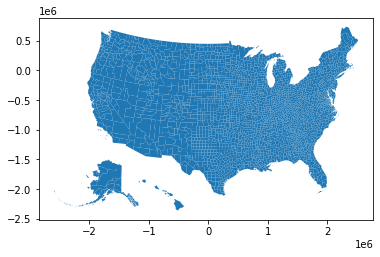

In [14]:
# can actually plot it in geopandas too
shapefile.plot()

Now use this updated file as Plotly shows to get a better/more accurate map

In [8]:
with urlopen('https://raw.githubusercontent.com/AndrewTiu8/mapping/main/US_2020_county_sf.geojson') as response:
    counties = json.load(response)

In [13]:
counties['features'][0]

{'type': 'Feature',
 'properties': {'state': 'AZ', 'FIPS': '04023'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-1082961.723173329, -1421463.587717318],
    [-1065631.9125692083, -1423807.3211900652],
    [-1063730.7975085583, -1423954.4302628352],
    [-1061229.246018644, -1401557.460895016],
    [-1051203.5748402174, -1402822.0903748232],
    [-1032520.7783807256, -1405162.241443646],
    [-1032034.0806303459, -1404668.9739262387],
    [-993917.6436931347, -1409466.7283209492],
    [-995282.9390129354, -1422337.593848787],
    [-996088.5659560177, -1422245.1498588072],
    [-997708.2231096238, -1438207.7218329317],
    [-999268.492392672, -1453092.4735177218],
    [-999308.5183872124, -1453087.75948044],
    [-1031130.3082034106, -1449054.8542646477],
    [-1050616.9849105002, -1446738.9422252835],
    [-1057653.596076039, -1445825.7493849401],
    [-1062267.2777283809, -1443365.9365262622],
    [-1084116.1926647227, -1431918.2142957265],
    [-1082961.723173329, -1421463.5

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})
df.head()

,fips,unemp
0,01001,5.3
1,01003,5.4
2,01005,8.6
3,01007,6.6
4,01009,5.5


In [4]:
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.update_layout(autosize=False, width=800, height=800)
fig.show()

In [ ]:
fig = px.choropleth(df, geojson=counties, locations='fips', featureidkey='properties.FIPS',
                    color='unemp',
                    color_continuous_scale='Viridis',
                    range_color=(0, 12),
                    scope='usa',
                    labels={'unemp': 'unemployment rate'})
fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0},
                  size=)
fig.show()